# Downloading data

### Learning outcomes
1. working with real-world data sets. 
2. processing CSV and JSON files. 
3. extracting data that needs to be focussed on.
4. Use of datetime module with Matplotlib, and plot multiple data series on one chart.
5. Style plotly charts and maps

### CSV File Headers

In [4]:
import csv

filename = "E:\machine learning projects\sitka_weather_07-2018_simple.csv"
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader) #reads next/first line
    print(header_row)

['STATION', 'NAME', 'DATE', 'PRCP', 'TAVG', 'TMAX', 'TMIN']


#### Printing the headers and their Positions

In [5]:
import csv

filename = "E:\machine learning projects\sitka_weather_07-2018_simple.csv"
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader) #reads next/first line
    
    for a, b in enumerate(header_row):
        print(a, b)
    
    

0 STATION
1 NAME
2 DATE
3 PRCP
4 TAVG
5 TMAX
6 TMIN


### Extracting and reading data
- high temperatures for the day

In [10]:
filename = "E:\machine learning projects\sitka_weather_07-2018_simple.csv"
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader) #reads next/first line

    highs = []    # reading and processing rest of the file
    for row in reader:
        high = int(row[5])  #TMAX index is 5
        highs.append(high)
print(highs)

[62, 58, 70, 70, 67, 59, 58, 62, 66, 59, 56, 63, 65, 58, 56, 59, 64, 60, 60, 61, 65, 65, 63, 59, 64, 65, 68, 66, 64, 67, 65]


#### Plotting data in temperature chart

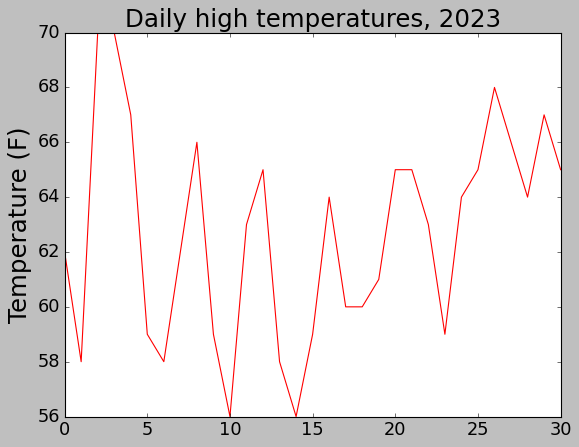

In [17]:
import csv
import matplotlib.pyplot as plt

filename = "E:\machine learning projects\sitka_weather_07-2018_simple.csv"
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader) #reads next/first line

# plotting
plt.style.use('classic')
fig, ax = plt.subplots()
ax.plot(highs, c= 'red')

#formatting
ax.set_title("Daily high temperatures, 2023", fontsize = 22)
ax.set_xlabel('', fontsize = 16)
ax.set_ylabel("Temperature (F)", fontsize = 22)
ax.tick_params(axis = 'both', which = 'major', labelsize=16)
plt.show()

In [ ]:
### Plotting dates

In [25]:
from datetime import datetime
first_date = datetime.strptime('2023-10-14', '%Y-%m-%d')
print(first_date)                              

2023-10-14 00:00:00


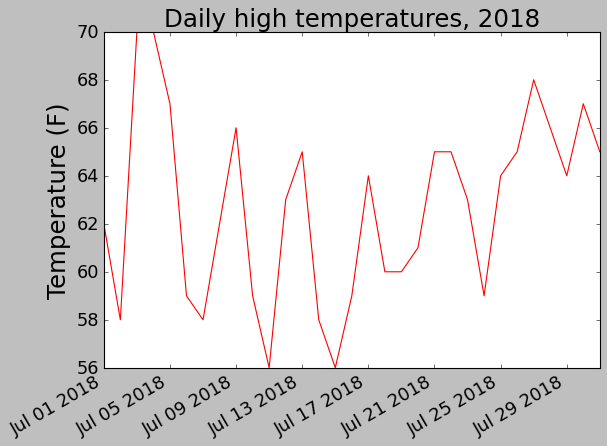

In [29]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt


filename = "E:\machine learning projects\sitka_weather_07-2018_simple.csv"
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader) #reads next/first line
    
    #getting dates and highs
    dates, highs = [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        high = int(row[5])
        dates.append(current_date)
        highs.append(high)

# plotting
plt.style.use('classic')
fig, ax = plt.subplots()
ax.plot(dates, highs, c= 'red')

#formatting
ax.set_title("Daily high temperatures, 2018", fontsize = 22)
ax.set_xlabel('', fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize = 22)
ax.tick_params(axis = 'both', which = 'major', labelsize=16)
plt.show()

#### Plotting a second data series

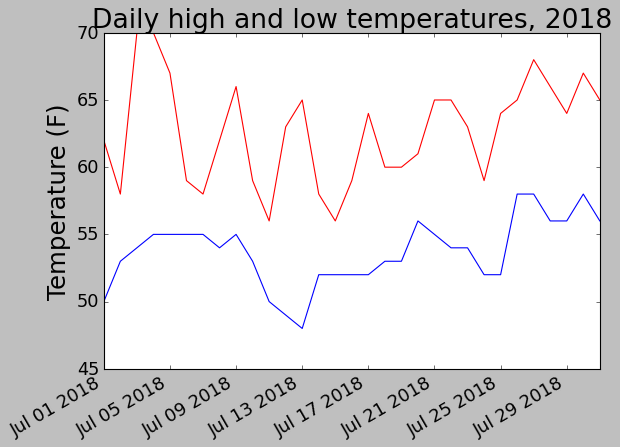

In [36]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt


filename = "E:\machine learning projects\sitka_weather_07-2018_simple.csv"
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader) #reads next/first line
    
    #getting dates and highs
    dates, highs, lows = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        high = int(row[5])
        low = int(row[6])         #low added
        dates.append(current_date)
        highs.append(high)
        lows.append(low)          #low appended

# plotting
plt.style.use('classic')
fig, ax = plt.subplots()
ax.plot(dates, highs, c= 'red')
ax.plot(dates, lows, c = 'blue')


#formatting
ax.set_title("Daily high and low temperatures, 2018", fontsize = 24)
ax.set_xlabel('', fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize = 22)
ax.tick_params(axis = 'both', which = 'major', labelsize=16)
plt.show()

#### Shading an Area in the chart
- alpha controls colors transpirancy (alpha value; 0 to 1 = completely transparent to opaque)
- passing fill_between() the list dates for the x-values and then the two y-value series highs and lows.

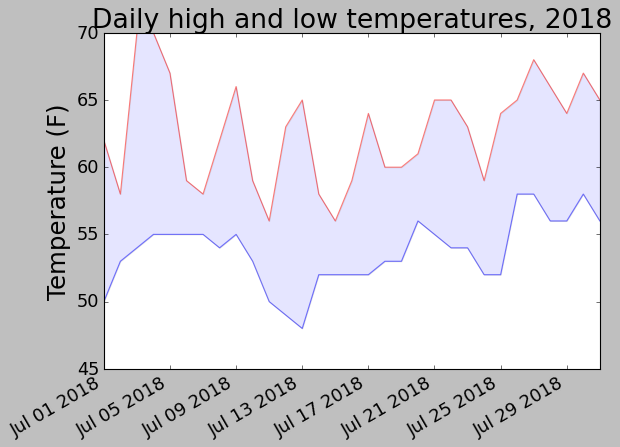

In [42]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt


filename = "E:\machine learning projects\sitka_weather_07-2018_simple.csv"
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader) #reads next/first line
    
    #getting dates and highs
    dates, highs, lows = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        high = int(row[5])
        low = int(row[6])         
        dates.append(current_date)
        highs.append(high)
        lows.append(low)          

# plotting
plt.style.use('classic')
fig, ax = plt.subplots()
ax.plot(dates, highs, c= 'red', alpha = 0.5)      #alpha for transpirancy added here
ax.plot(dates, lows, c= 'blue', alpha = 0.5)
ax.fill_between (dates, highs, lows, facecolor= 'blue', alpha = 0.1)


#formatting
ax.set_title("Daily high and low temperatures, 2018", fontsize = 24)
ax.set_xlabel('', fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize = 22)
ax.tick_params(axis = 'both', which = 'major', labelsize=16)
plt.show()

### Error checking
- we'll provide wrong row nunbers as inputs

In [43]:
filename = "E:\machine learning projects\sitka_weather_07-2018_simple.csv"
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader) #reads next/first line
    
    #getting dates and highs
    dates, highs, lows = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        high = int(row[4])
        low = int(row[5])         
        dates.append(current_date)
        highs.append(high)
        lows.append(low)          

# plotting
plt.style.use('classic')
fig, ax = plt.subplots()
ax.plot(dates, highs, c= 'red', alpha = 0.5)      #alpha for transpirancy added here
ax.plot(dates, lows, c= 'blue', alpha = 0.5)
ax.fill_between (dates, highs, lows, facecolor= 'blue', alpha = 0.1)


#formatting
ax.set_title("Daily high and low temperatures, 2018", fontsize = 24)
ax.set_xlabel('', fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize = 22)
ax.tick_params(axis = 'both', which = 'major', labelsize=16)
plt.show()

ValueError: invalid literal for int() with base 10: ''

#### Fixing the above error with try/except/else block

Missing data for 2018-07-01 00:00:00
Missing data for 2018-07-02 00:00:00
Missing data for 2018-07-03 00:00:00
Missing data for 2018-07-04 00:00:00
Missing data for 2018-07-05 00:00:00
Missing data for 2018-07-06 00:00:00
Missing data for 2018-07-07 00:00:00
Missing data for 2018-07-08 00:00:00
Missing data for 2018-07-09 00:00:00
Missing data for 2018-07-10 00:00:00
Missing data for 2018-07-11 00:00:00
Missing data for 2018-07-12 00:00:00
Missing data for 2018-07-13 00:00:00
Missing data for 2018-07-14 00:00:00
Missing data for 2018-07-15 00:00:00
Missing data for 2018-07-16 00:00:00
Missing data for 2018-07-17 00:00:00
Missing data for 2018-07-18 00:00:00
Missing data for 2018-07-19 00:00:00
Missing data for 2018-07-20 00:00:00
Missing data for 2018-07-21 00:00:00
Missing data for 2018-07-22 00:00:00
Missing data for 2018-07-23 00:00:00
Missing data for 2018-07-24 00:00:00
Missing data for 2018-07-25 00:00:00
Missing data for 2018-07-26 00:00:00
Missing data for 2018-07-27 00:00:00
M

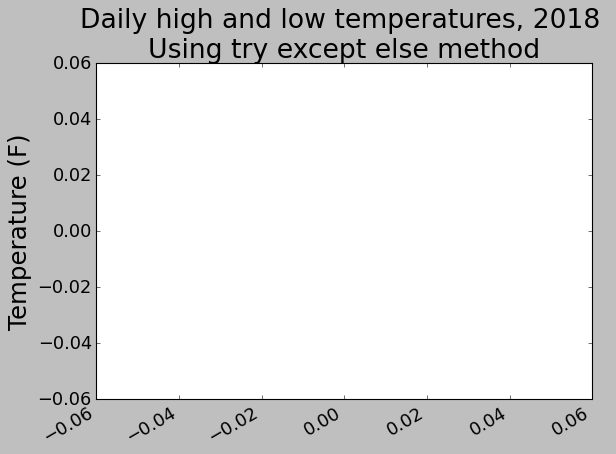

In [56]:
filename = "E:\machine learning projects\sitka_weather_07-2018_simple.csv"
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader) #reads next/first line
    
    #getting dates and highs
    dates, highs, lows = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        try:
            high = int(row[4])
            low = int(row[5])
        except ValueError:
            print(f"Missing data for {current_date}")
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)        

# plotting
plt.style.use('classic')
fig, ax = plt.subplots()
ax.plot(dates, highs, c= 'red', alpha = 0.5)      #alpha for transpirancy added here
ax.plot(dates, lows, c= 'blue', alpha = 0.5)
ax.fill_between (dates, highs, lows, facecolor= 'blue', alpha = 0.1)


#formatting
ax.set_title("Daily high and low temperatures, 2018 \nUsing try except else method", fontsize = 24)
ax.set_xlabel('', fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize = 22)
ax.tick_params(axis = 'both', which = 'major', labelsize=16)
plt.show()

#### Downloading your own data
- practice session 
- STEPS (https://www.ncdc.noaa.gov/cdo-web/ > search tool > daily summeries > city- Toronto > click search > add to cart > custom GHCN-Daily CSV > continue > data will be emailed)

In [8]:
import csv

filename_1 = "E:\\machine learning projects\\3495022.csv"
with open(filename_1) as f_1:
    reader = csv.reader(f_1)
    header_row = next(reader) #reads next/first line
    
    for a, b in enumerate(header_row):
        print(a, b)

0 STATION
1 NAME
2 LATITUDE
3 LONGITUDE
4 ELEVATION
5 DATE
6 DAPR
7 DAPR_ATTRIBUTES
8 MDPR
9 MDPR_ATTRIBUTES
10 PRCP
11 PRCP_ATTRIBUTES
12 SNOW
13 SNOW_ATTRIBUTES
14 SNWD
15 SNWD_ATTRIBUTES
16 TAVG
17 TAVG_ATTRIBUTES
18 TMAX
19 TMAX_ATTRIBUTES
20 TMIN
21 TMIN_ATTRIBUTES
22 WDFG
23 WDFG_ATTRIBUTES
24 WESD
25 WESD_ATTRIBUTES
26 WESF
27 WESF_ATTRIBUTES
28 WSFG
29 WSFG_ATTRIBUTES


In [21]:
import csv
from datetime import datetime

filename_1 = "E:\\machine learning projects\\3495022.csv"
with open(filename_1) as f_1:
    reader = csv.reader(f_1)
    header_row = next(reader) #reads next/first line
    
    #getting dates and highs
    dates, prcp = [], []

    #processing data inside the 'with' block
    for row in reader:
        current_date = datetime.strptime(row[5], '%Y-%m-%d')
        prcp_value = float(row[10])
        DATE.append(current_date)
        PRCP.append(prcp_value)
        
        # Check if the value is not an empty string before converting to float
        if prcp:
            prcp_value = float(prcp)
            dates.append(current_date)
            prcp.append(prcp_value)

ValueError: could not convert string to float: ''

In [ ]:
### Mapping Global Data sets: JSON Format

In [ ]:
### Making a list of all earthquakes

In [ ]:
### Extracting magnitues

In [ ]:
### Extracting location data

In [ ]:
### Building a World map

In [ ]:
### Different way of specifying Chart data

In [ ]:
### Customize marker size

In [ ]:
### Customize marker colors

In [ ]:
### Other colorscales

In [ ]:
### Adding hover text